<a href="https://colab.research.google.com/github/Memohacker/Data_Science_CodeSoft_Intern_Tasks/blob/main/Task2_MOVIE_RATING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 2 indain movies**

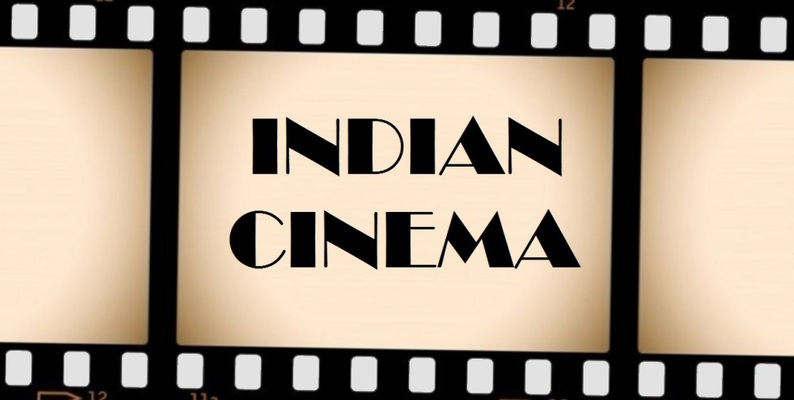

In [20]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")


# Load the movie dataset




In [39]:
data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')


In [43]:
data.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# **Preprossing**






Drop rows with missing 'Rating' values


In [22]:
data.dropna(subset=['Rating'], inplace=True)


 Extract only the numeric part from the 'Year' and 'Duration' column


In [23]:

data['Year'] = data['Year'].str.extract('(\d+)').astype(float)

data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)
warnings.filterwarnings("ignore")


Remove commas from the 'Votes' and 'Rating' and  column and convert it to a float

In [24]:
# Remove commas from the 'Votes' column and convert it to a float
data['Votes'] = data['Votes'].str.replace(',', '').astype(float)

# Remove outliers in the 'Rating' column (e.g., ratings above 10)
data = data[data['Rating'] <= 10]


 Define the features and target variable


In [25]:
selected_features = ['Year', 'Duration', 'Votes', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target_variable = 'Rating'


 Ensure that the selected features exist in the dataset


In [27]:
for feature in selected_features:
    if feature not in data.columns:
        print(f"Error: '{feature}' not found in the dataset.")
        exit(1)


Separate features and target variable


In [28]:
X = data[selected_features]
y = data[target_variable]

Split the data into training and testing sets


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocessing pipeline for categorical and numerical features


In [30]:
numerical_features = ['Year', 'Duration', 'Votes']
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

 Modify the preprocessor to include an imputer for numerical features and set handle_unknown='ignore'


In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), categorical_features)
    ])


 Create a Ridge regression pipeline with an imputer


In [32]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('regressor', Ridge(alpha=1.0))  # Ridge regression with default alpha
])
# Suppress warnings
warnings.filterwarnings("ignore")


# Fit the model


In [33]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('imputer', SimpleImputer()), ('regressor', Ridge())])

# Make predictions


In [34]:
y_pred = pipeline.predict(X_test)


# Data Visualization


Visualize the relationship between 'Votes' and 'Rating'

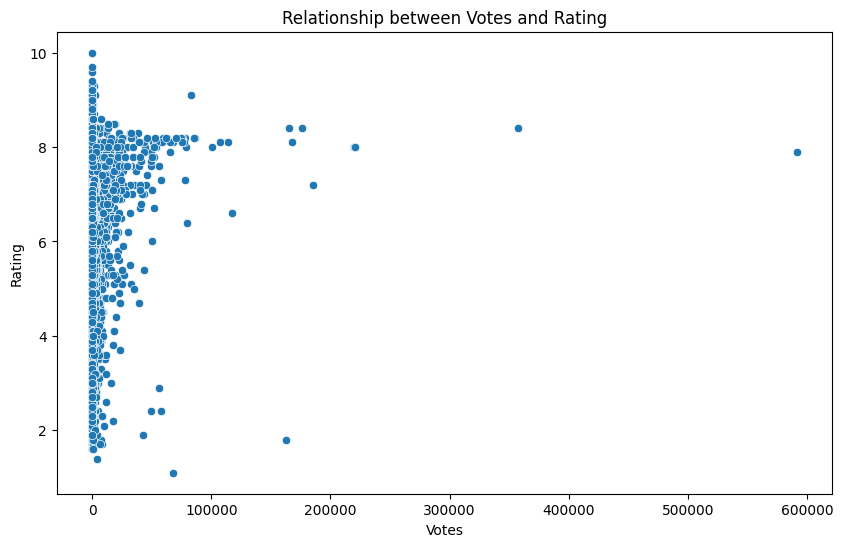

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=data)
plt.title('Relationship between Votes and Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

Visualize the distribution of 'Rating'

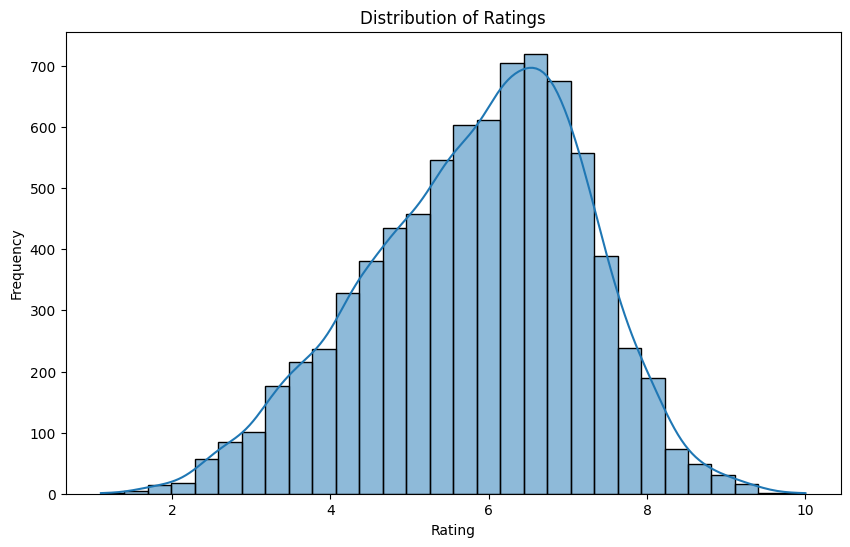

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Evaluate the model


In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 1.44


Implement cross-validation to get a more robust evaluation


In [38]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = -cross_val_score(pipeline, X, y, cv=5, scoring=scorer)
print(f"Cross-Validated MSE: {np.mean(cv_scores):.2f}")

# Reset warnings to their default state
warnings.resetwarnings()

Cross-Validated MSE: 1.52
